In [1]:
%matplotlib inline
from taxi_pakage import *
taxi = pd.read_csv("edited_train.csv")

In [2]:
# 날씨 데이터 생성
weather_event = ['20160110', '20160113', '20160117', '20160123', '20160205', '20160208', '20160215', '20160216',
                 '20160224', '20160225', '20160314', '20160315', '20160328', '20160329', '20160403', '20160404',
                 '20160530', '20160628']

weather_event = pd.Series(pd.to_datetime(weather_event, format = '%Y%m%d')).dt.date
weather_event = weather_event.astype('<U32')
weather_event = list(weather_event)

taxi["y-m-d"] = pd.to_datetime(taxi["pickup_datetime"]).apply(lambda x: x.strftime("%Y-%m-%d"))
taxi["extreme_weather"] = taxi["y-m-d"].apply(lambda x: 1 if x in weather_event else 0)
taxi["weather_event"] = taxi["extreme_weather"] # 날씨 (1:자연재해,  0:자연재해X)
taxi.drop(['y-m-d', 'extreme_weather'], axis=1, inplace=True)

In [3]:
taxi['sqrt_log_dist'] = taxi['dist'].apply(lambda x: np.sqrt(np.log1p(x)))
taxi['log_duration'] = taxi['trip_duration'].apply(lambda x: np.log1p(x))
taxi['velo'] = taxi['dist']/taxi['trip_duration']*3600 # 시속
taxi = taxi[taxi['trip_duration'] < 1500000].reset_index(drop=True)
taxi = taxi[taxi['velo']<100]

In [4]:
taxi = taxi[taxi['trip_duration'] < 1500000].reset_index(drop=True)
taxi = taxi[taxi['velo']<100]

In [5]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
model1 = sm.OLS.from_formula("log_duration ~ \
                               scale(sqrt_log_dist)*C(vendor_id)\
                             + scale(sqrt_log_dist)*C(work)\
                             + C(weekday)\
                             + C(hour)\
                             + scale(sqrt_log_dist)*scale(weather_event)\
                             + scale(month)\
                             +0", data = taxi)
result = model1.fit()
storage(result, results, 'basic')

In [7]:
taxi_filtered, dropped = erase_outlier_np(result, taxi, category=True, dropped=True)
model2 = sm.OLS.from_formula("log_duration ~ \
                               scale(sqrt_log_dist)*C(vendor_id)\
                             + scale(sqrt_log_dist)*C(work)\
                             + C(weekday)\
                             + C(hour)\
                             + scale(sqrt_log_dist)*scale(weather_event)\
                             + scale(month)\
                             +0", data = taxi_filtered)
result2 = model2.fit()
storage(result2, results, 'w/o_outlier')

In [8]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_duration   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                 1.073e+05
Date:                Sun, 18 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:16:16   Log-Likelihood:            -5.6696e+05
No. Observations:             1408149   AIC:                         1.134e+06
Df Residuals:                 1408111   BIC:                         1.134e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
C(vendor_id)[1]                               6.2023      0.002   3253.001      0.000       6.199       6.206
C(vendor_id)[2]                               6.2040      0.002   3265.776      0.000       6.200       6.208
C(work)[T.1]                                  0.2442      0.001    165.791      0.000       0.241       0.247
C(weekday)[T.1]                               0.0924      0.001     78.092      0.000       0.090       0.095
C(weekday)[T.2]                               0.1162      0.001     98.355      0.000       0.114       0.119
C(weekday)[T.3]                               0.1286      0.001    109.089      0.000       0.126       0.131
C(weekday)[T.4]                               0.1140      0.001     96.960      0.000       0.112       0.116
C(weekday)[T.5]                               0.1782      0.002    115.183      0.000       0.175       0.181
C(weekday)[T.6]                               0.0862      0.002     54.624      0.000       0.083       0.089
C(hour)[T.1]                                 -0.0519      0.002    -20.955      0.000      -0.057      -0.047
C(hour)[T.2]                                 -0.0830      0.003    -30.088      0.000      -0.088      -0.078
C(hour)[T.3]                                 -0.1215      0.003    -39.498      0.000      -0.128      -0.115
C(hour)[T.4]                                 -0.1773      0.003    -51.256      0.000      -0.184      -0.171
C(hour)[T.5]                                 -0.2627      0.004    -74.538      0.000      -0.270      -0.256
C(hour)[T.6]                                 -0.1673      0.003    -63.946      0.000      -0.172      -0.162
C(hour)[T.7]                                  0.0738      0.002     32.401      0.000       0.069       0.078
C(hour)[T.8]                                  0.0500      0.002     21.214      0.000       0.045       0.055
C(hour)[T.9]                                  0.1000      0.002     42.787      0.000       0.095       0.105
C(hour)[T.10]                                 0.1046      0.002     44.788      0.000       0.100       0.109
C(hour)[T.11]                                 0.1385      0.002     59.944      0.000       0.134       0.143
C(hour)[T.12]                                 0.1510      0.002     65.969      0.000       0.147       0.155
C(hour)[T.13]                                 0.1402      0.002     61.186      0.000       0.136       0.145
C(hour)[T.14]                                 0.1549      0.002     67.998      0.000       0.150       0.159
C(hour)[T.15]                                 0.1601      0.002     69.900      0.000       0.156       0.165
C(hour)[T.16]                                 0.1287      0.002     55.077      0.000       0.124       0.133
C(h

In [9]:
results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.634,2002340.499,2002803.829,35.223,0.0,0.0,0.0,1.999,basic
1,0.738,1133996.168,1134458.164,35.330,0.0,0.0,0.0,1.998,w/o_outlier


## VIF

In [11]:
taxi_vif = taxi_filtered[['sqrt_log_dist', 'vendor_id', 'work', 'weekday', 'hour', 'month', 'weather_event']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_vif.values, i) for i in range(taxi_vif.shape[1])]
vif["features"] = taxi_vif.columns
vif

,VIF Factor,features
0,10.930069,sqrt_log_dist
1,8.371189,vendor_id
2,2.311265,work
3,3.941006,weekday
4,5.048276,hour
5,4.941531,month
6,1.134630,weather_event


## Nomality test

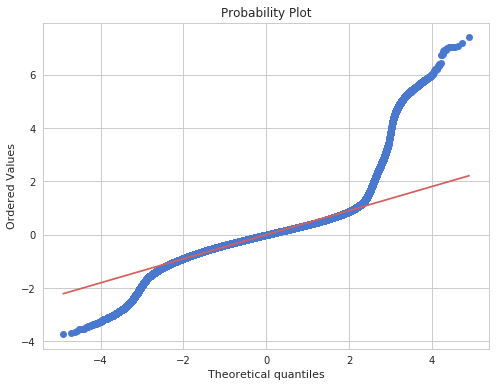

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result.resid, plot = plt)
plt.show()

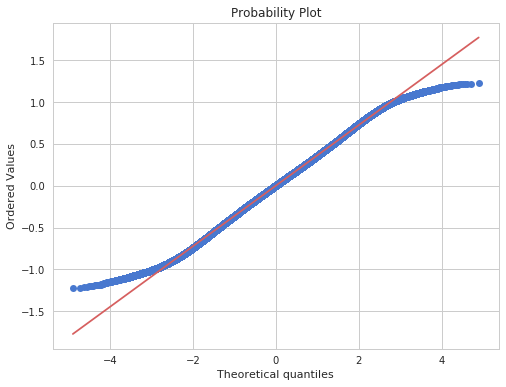

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result2.resid, plot = plt)
plt.show()

## partial regression

MemoryError: 

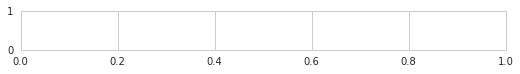

In [15]:
fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
sm.graphics.plot_partregress_grid(result2, fig=fig)
plt.show()